In [20]:
import basic_model_sample
from basic_model_sample import DenseLayer, Sequential, SGD
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.datasets import mnist
from basic_conversions import matrix_as_felt_string, vector_as_felt_string
from matplotlib import pyplot as plt

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1).astype(np.float32) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype(np.float32) / 255.0

encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

(X_train, y_train, X_test, y_test)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0.

In [18]:
# (X_train, y_train, X_test, y_test) = mnist_dataset()

layers = [
    DenseLayer(input_shape=784, output_shape=15, activation="ReLU"), 
    DenseLayer(output_shape=15, activation="ReLU"), 
    DenseLayer(output_shape=10, activation="ReLU")
]

network = Sequential(layers, SGD(learning_rate=0.01))
network.build()
print(f"Num params: {network.num_params()}")

network.train(X_train, y_train, epochs=30, batch_size=64, verbose=True)

predictions = network.forward(X_test)
loss = network.mse_loss(predictions, y_test)
print(f"Final loss on test set: {loss}")

Num params: 12175
Epoch 1, Loss: 0.09201057044415517
Epoch 11, Loss: 0.07434445149513084
Epoch 21, Loss: 0.027917172121482932
Final loss on test set: 0.018783372629193475


---
Predictions: [7 2 1 ... 4 5 6]
Actual: [7 2 1 ... 4 5 6]


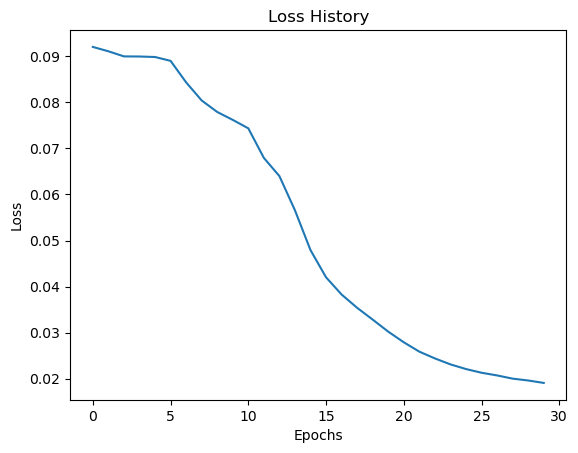

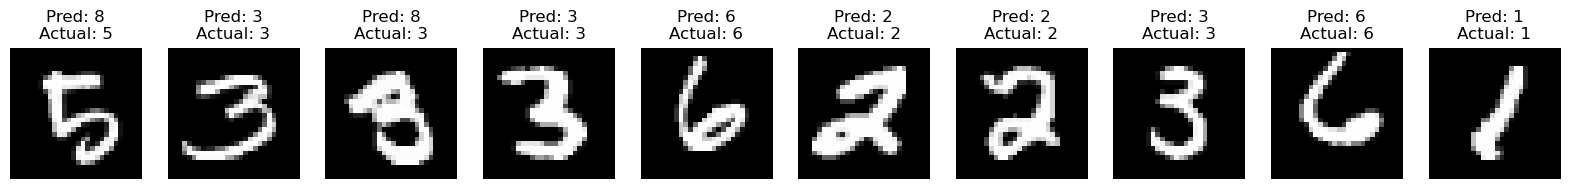

12175


In [21]:
print("---")
print("Predictions:", np.argmax(predictions, axis=1))
print("Actual:", np.argmax(y_test, axis=1))

plt.plot(network.loss_history)
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

num_samples = 10
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
sample_images = X_test[indices].reshape(-1, 28, 28)
sample_predictions = np.argmax(predictions[indices], axis=1)
sample_actual = np.argmax(y_test[indices], axis=1)

fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i], cmap='gray')
    ax.set_title(f"Pred: {sample_predictions[i]}\nActual: {sample_actual[i]}")
    ax.axis('off')
plt.show()

print(network.num_params())
